## Simulating Information Spread and Sentiment Analysis in Agent-Based Modeling

Today's workshop will explore how `agent-based models (ABM)` can simulate `information dissemination` and the resulting `sentiment behaviors` within a community of agents. We aim to understand the complex dynamics of information spread and emotional feedback loops in a simulated environment.

For this, we will rely on our ABM developed in `NetLogo`, which visualizes `agents' interactions` as they share information and undergo sentiment changes. After simulating NetLogo, we export the generated data and move it into Python for advanced analysis and predictive modeling using machine learning techniques like `Random Forest` and `XGBoost`.

*This activity simulates how agents receive, share, or suppress information over time and how their collective behaviors impact sentiment within a community. Leveraging Python, we clean and format the data, engineer features such as **spread rate** and **success rate**, and use predictive models to forecast agent behaviors based on historical trends.*

If you want to replicate or extend this work, the `NetLogo model` and `Python code` can be accessed on [GitHub](https://github.com/pifparfait/MAS.552-Fall-2024/). During this session, we will walk through the simulation, data export, and advanced analysis to explore how ABM and machine learning can complement each other.

---


❗❗❗Before we start, save a copy of this Collab to your Drive ❗❗❗

> **File > Save a copy to Drive**

---

## Exercise: Sentiment and Information Spread Simulation Design

In this practical exercise, we will simulate the spread of information and sentiment dynamics in a community of agents. The agents will exchange information and experience emotional changes, and our task is to analyze their behavior using **NetLogo** for simulation and **Python** for further analysis and predictions.

### System Variables:
We will define the system by adjusting two main variables:

- **Information Sharing Rate**: This controls how quickly agents share information with others in their environment. A higher sharing rate means more agents will become informed faster, which may also lead to faster emotional changes.
  
- **Sentiment Sharing Rate**: This variable determines how much an agent's sentiment affects others. Higher values increase the influence an agent has on the emotional state of others.

### Task:

You will need to analyze the results in the provided **slides** for your group. In the slides, you should:

- **Explain your choices**: Briefly explain why you selected specific values for **Information Sharing Rate** and **Sentiment Sharing Rate**.
  
- **Analyze model output**: Use the graphs and performance metrics generated from the simulation to describe the spread of information and sentiment.
  
- **Visualize model results**: Include the plots showing the spread of information and sentiment over time, generated from **NetLogo** and **Python**.

---

## Step 1: Running the NetLogo Simulation

- Use **NetLogo** to simulate a community of agents where information spreads, and their sentiment changes based on interactions.
  
- Adjust the **Information Sharing Rate** and **Sentiment Sharing Rate** sliders to different values to see how these affect the overall system.

Monitor the Sentiment Diffusion graph to track the number of agents who are informed and how sentiment changes over time.

---

## Step 2: Export Data and Analyze in Python

- Export the data generated in **NetLogo** using the **Export** button.

- Load the data into Python, which we process using machine learning models such as **Random Forest** and **XGBoost**.

- Use Python to clean and format the data, extracting features like:
  - **Spread Rate**
  - **Attempt Rate**
  - **Success Rate**

- Analyze the predictive power of the machine learning models by comparing predictions with actual simulation data.

---

## Step 3: Present Your Findings

- Add your findings to the **slides**:
  - **Justify your parameters choices**: Why did you select the specific information and sentiment sharing rates?
  - **Display results**: Show the model output, including key metrics and graphs generated from **NetLogo** and **Python**.
  - **Evaluate performance**: Comment on the model's accuracy and performance based on the machine learning predictions.

---

### Suggested Things to Try:

- **Adjust the sharing rates**: Experiment with different values for the information and sentiment sharing rates to observe how these impact agents' behavior.
  
**Extend the analysis**: Use Python's results to try predicting future trends in the system by tweaking learning models or data processing techniques.

---

This guide provides a structured workflow for the practical session, enabling participants to explore information diffusion and sentiment dynamics within a community, simulate it using **NetLogo**, and analyze the results in **Python**.


# Predicting Successes and Spread of Information with Linear Regression

This exercise uses **Linear Regression** to predict the number of successes based on the number of attempts in a network over time. We will walk through how to calculate additional features like the **Spread Rate**, **Failed Attempt Rate**, and identify critical points where abrupt changes in the **Success Rate** occur.

## Explanation of the Steps:

### 1. Importing Libraries:
- We import necessary libraries like `pandas` for data manipulation, `matplotlib.pyplot` for visualization, `LinearRegression` for the regression model, and `numpy` for numerical operations.

### 2. Simulated Data:
- We create a DataFrame `df` that contains simulated data of informed individuals, attempts, and successes over time. Each tick represents a time step in our simulation.

### 3. Feature Engineering:
- We calculate additional features that help improve our analysis:
  - **Success Rate**: The percentage of successes out of total attempts.
  - **Failed Attempt Rate**: The percentage of failed attempts out of total attempts.
  - **Spread Rate**: The change in the number of informed individuals per tick.

### 4. Linear Regression for Prediction:
- We use **Linear Regression** to predict the number of successes based on the number of attempts. This allows us to estimate how the success rate evolves over time.

### 5. Identifying Critical Points:
- We identify critical points where the **Success Rate** changes abruptly (e.g., greater than 1% change). These points can highlight significant moments in the spread of information.

### 6. Visualization:
- We visualize the following:
  - **Total Informed** over time to show the overall spread of information.
  - **Success Rate** over time to track the performance of attempts.
  - **Failed Attempt Rate** over time to observe the rate of failed attempts.
  - **Spread Rate** to show how the number of informed individuals changes per tick.

### 7. Displaying Critical Points:
- We display the critical points where there are abrupt changes in the **Success Rate**.


In [1]:
import pandas as pd

def load_and_format_data_from_csv(url):
    try:
        # Load the CSV file with the correct link (ensure it's a direct download link)
        df = pd.read_csv(url, delimiter=',', on_bad_lines='skip', header=None)
        print("Data loaded successfully!")

        # Display the first few rows and the number of columns
        print("First few rows of the data:\n", df.head())
        print("Number of columns:", df.shape[1])

        # Check if the CSV has the expected number of columns (e.g., 5)
        expected_columns = 5
        if df.shape[1] == expected_columns:
            # Extract numeric values from the strings
            df[0] = df[0].str.extract(r'(\d+)').astype(int)  # Extract Tick
            df[1] = df[1].str.extract(r'(\d+)').astype(int)  # Extract Total_Informed
            df[2] = df[2].str.extract(r'(\d+\.?\d*)').astype(float)  # Extract Sentiment_Rate
            df[3] = df[3].str.extract(r'(\d+)').astype(int)  # Extract Attempts
            df[4] = df[4].str.extract(r'(\d+)').astype(int)  # Extract Successes

            # Rename columns to meaningful names
            df.columns = ['Tick', 'Total_Informed', 'Sentiment_Rate', 'Attempts', 'Successes']
            return df
        else:
            print(f"Unexpected number of columns. Expected {expected_columns}, but got {df.shape[1]}")
            return None

    except pd.errors.ParserError as e:
        print(f"ParserError: {e}")
        return None

# Example usage with a direct download link:
url = 'https://raw.githubusercontent.com/pifparfait/MAS.552-Fall-2024/main/mem_MAS_552.csv'  # Replace with the correct raw link
formatted_df = load_and_format_data_from_csv(url)

# Show the first few rows to verify the structure
if formatted_df is not None:
    print(formatted_df.head())

Data loaded successfully!
First few rows of the data:
          0                   1                         2              3  \
0  Tick: 0   Total Informed: 5   Sentiment Rate: 485.629    Attempts: 5   
1  Tick: 1   Total Informed: 5   Sentiment Rate: 485.629   Attempts: 10   
2  Tick: 2   Total Informed: 5   Sentiment Rate: 485.629   Attempts: 15   
3  Tick: 3   Total Informed: 5   Sentiment Rate: 485.629   Attempts: 20   
4  Tick: 4   Total Informed: 5   Sentiment Rate: 485.629   Attempts: 25   

               4  
0   Successes: 0  
1   Successes: 0  
2   Successes: 0  
3   Successes: 0  
4   Successes: 0  
Number of columns: 5
   Tick  Total_Informed  Sentiment_Rate  Attempts  Successes
0     0               5         485.629         5          0
1     1               5         485.629        10          0
2     2               5         485.629        15          0
3     3               5         485.629        20          0
4     4               5         485.629        25     

In [2]:

data = formatted_df.to_csv(index=False)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Data copied in CSV format


# Load data into a DataFrame
from io import StringIO
df = pd.read_csv(StringIO(data))
df_bck = df
# Calculate success rate
df['Success_Rate'] = df['Successes'] / df['Attempts'] * 100

# 1. Calculate the failed attempt rate
df['Failed_Attempts'] = df['Attempts'] - df['Successes']
df['Failed_Attempt_Rate'] = df['Failed_Attempts'] / df['Attempts'] * 100

# 2. Calculate the spread rate (increment in informed individuals per tick)
df['Spread_Rate'] = df['Total_Informed'].diff().fillna(0)

# 3. Linear regression to predict successes based on attempts
X = df[['Attempts']]  # Independent variable
y = df['Successes']  # Dependent variable
reg = LinearRegression().fit(X, y)
df['Predicted_Successes'] = reg.predict(X)

# 4. Identify critical points in the success rate where abrupt changes occur
df['Success_Rate_Change'] = df['Success_Rate'].diff().fillna(0)
critical_points = df[abs(df['Success_Rate_Change']) > 1]  # Changes greater than 1%



## Metrics' Visualization

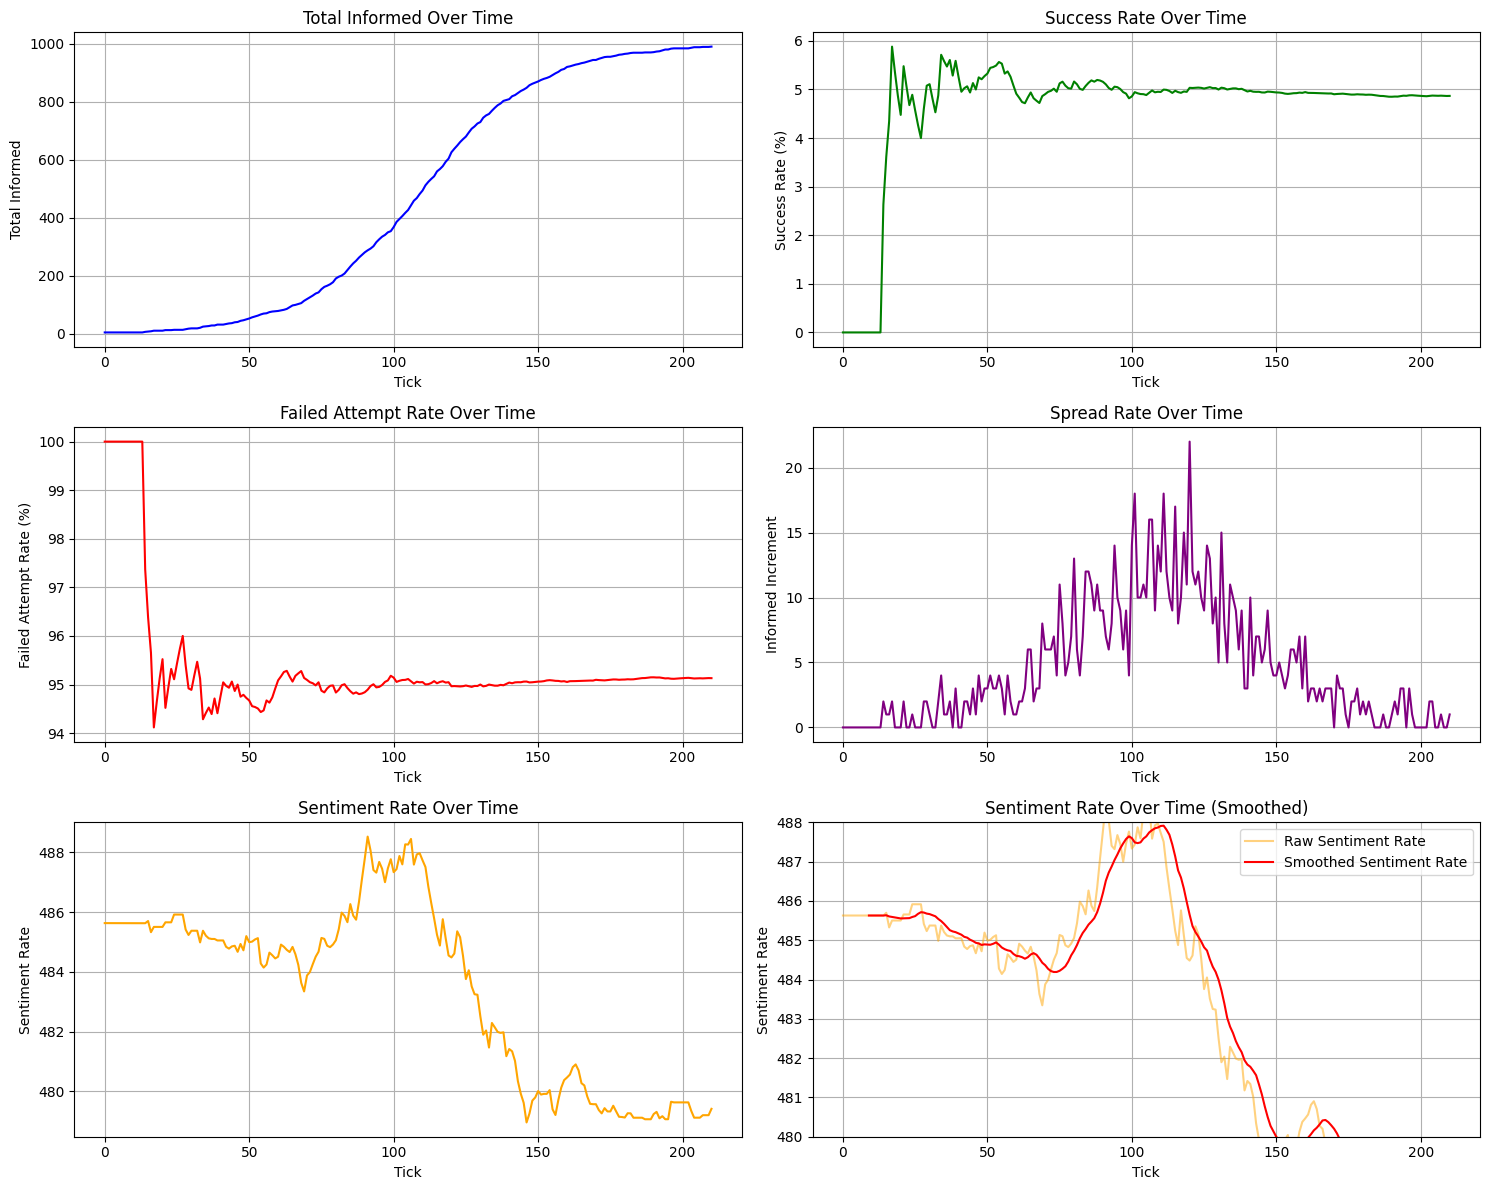

Critical points of abrupt changes in success rate:
    Tick  Success_Rate  Success_Rate_Change
14    14      2.631579             2.631579
17    17      5.882353             1.534527
21    21      5.479452             1.001840


In [4]:
# Visualization including Sentiment Rate
plt.figure(figsize=(15, 12))

# Plot for Total Informed
plt.subplot(3, 2, 1)
plt.plot(df['Tick'], df['Total_Informed'], label='Total Informed', color='blue')
plt.title('Total Informed Over Time')
plt.xlabel('Tick')
plt.ylabel('Total Informed')
plt.grid()

# Plot for Success Rate
plt.subplot(3, 2, 2)
plt.plot(df['Tick'], df['Success_Rate'], label='Success Rate', color='green')
plt.title('Success Rate Over Time')
plt.xlabel('Tick')
plt.ylabel('Success Rate (%)')
plt.grid()

# Plot for Failed Attempt Rate
plt.subplot(3, 2, 3)
plt.plot(df['Tick'], df['Failed_Attempt_Rate'], label='Failed Attempt Rate', color='red')
plt.title('Failed Attempt Rate Over Time')
plt.xlabel('Tick')
plt.ylabel('Failed Attempt Rate (%)')
plt.grid()

# Plot for Spread Rate
plt.subplot(3, 2, 4)
plt.plot(df['Tick'], df['Spread_Rate'], label='Spread Rate', color='purple')
plt.title('Spread Rate Over Time')
plt.xlabel('Tick')
plt.ylabel('Informed Increment')
plt.grid()

# New Plot for Sentiment Rate
plt.subplot(3, 2, 5)
plt.plot(df['Tick'], df['Sentiment_Rate'], label='Sentiment Rate', color='orange')
plt.title('Sentiment Rate Over Time')
plt.xlabel('Tick')
plt.ylabel('Sentiment Rate')
plt.grid()

# Apply a rolling window for smoothing the Sentiment Rate
df['Smoothed_Sentiment'] = df['Sentiment_Rate'].rolling(window=10).mean()

# Plot the raw and smoothed Sentiment Rate
# Adjust the sentiment plot by focusing the y-axis range and applying smoothing
plt.subplot(3, 2, 6)
plt.plot(df['Tick'], df['Sentiment_Rate'], label='Raw Sentiment Rate', color='orange', alpha=0.5)
plt.plot(df['Tick'], df['Smoothed_Sentiment'], label='Smoothed Sentiment Rate', color='red')

# Zoom in by limiting the y-axis
plt.ylim(480, 488)

# Adding labels and title
plt.title('Sentiment Rate Over Time (Smoothed)')
plt.xlabel('Tick')
plt.ylabel('Sentiment Rate')
plt.grid(True)
plt.legend()


plt.tight_layout()
plt.show()

# Show critical points
print("Critical points of abrupt changes in success rate:")
print(critical_points[['Tick', 'Success_Rate', 'Success_Rate_Change']])


# Predicting the Spread of Information with Random Forest

This exercise uses **Random Forest (RF)** to predict the number of informed individuals in a network over time. We will walk through how to calculate additional features like the **Spread Rate** and **Failed Attempt Rate**, then use those features to train an RF model for predicting future spread patterns.

## Explanation of the Steps:

### 1. Importing Libraries:
- We import necessary libraries like `pandas` for data manipulation, `matplotlib.pyplot` for visualization, `train_test_split` for splitting the data, and `mean_squared_error` for evaluating our model.
- We also use `RandomForestRegressor` to implement the RF algorithm.

### 2. Simulated Data:
- We create a DataFrame `df` that contains simulated data of informed individuals over time.
- Each tick represents a time step in our simulation.

### 3. Feature Engineering:
- We calculate additional features that help improve our predictions:
  - **Spread Rate**: The change in the number of informed individuals from the previous tick.
  - **Failed Attempt Rate**: A calculation based on the maximum possible informed individuals (assumed to be 100% in this case).
- We also increase the number of lag features to capture more historical data, adding up to 5 lags.

### 4. Preparing Data for Modeling:
- We create our feature set `X` and the target variable `y` for prediction.
- The features include the lagged values, spread rate, and failed attempt rate.

### 5. Splitting Data:
- We split our dataset into training and testing sets to evaluate our model's performance.

### 6. Model Training:
- We create a Random Forest model and fit it to the training data.

### 7. Making Predictions:
- We use the trained model to predict the test set and evaluate its performance using **Mean Squared Error (MSE)**.

### 8. Visualization:
- We plot the actual values against the predicted values to visually assess the performance of our model.



Mean Squared Error (MSE) of Random Forest: 8.79898494995078


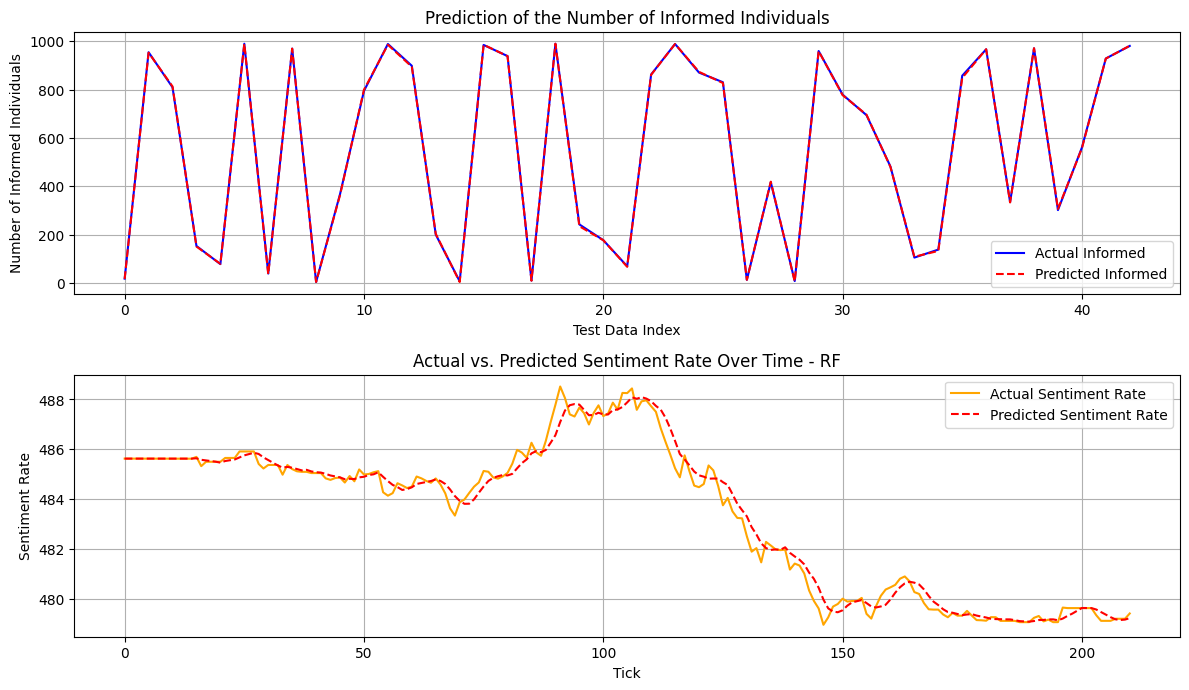

In [5]:
# 1. Importing Libraries:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already loaded with correct column names
# Load data into DataFrame

df = df_bck

data1 = {
    "Tick": df['Tick'],
    "Informed": df['Total_Informed'],  # Use 'Total_Informed' for the informed individuals
    "Sentiment": df['Sentiment_Rate']  # Use 'Sentiment_Rate' for the sentiment rate
}
df = pd.DataFrame(data1)


# 2. Feature Engineering for informed individuals:
df['Informed_lag1'] = df['Informed'].shift(1).fillna(0)
df['Informed_lag2'] = df['Informed'].shift(2).fillna(0)
df['Informed_lag3'] = df['Informed'].shift(3).fillna(0)

# 3. Preparing Data for Modeling (Informed):
X = df[['Informed_lag1', 'Informed_lag2', 'Informed_lag3']]
y = df['Informed']

# 4. Splitting Data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Model Training:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 6. Making Predictions:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE) of Random Forest: {mse}")

# 7. Visualization:

plt.figure(figsize=(12, 10))

# Plot 1: Actual vs. Predicted for the number of informed individuals
plt.subplot(3, 1, 1)
plt.plot(range(len(y_test)), y_test, label='Actual Informed', color='blue')
plt.plot(range(len(y_pred)), y_pred, label='Predicted Informed', linestyle='dashed', color='red')
plt.title('Prediction of the Number of Informed Individuals')
plt.xlabel('Test Data Index')
plt.ylabel('Number of Informed Individuals')
plt.grid()
plt.legend()

# Plot 2: Predicted Sentiment Rate (Optional)
# We will use a simple rolling average to simulate predicted sentiment
df['Predicted_Sentiment'] = df['Sentiment'].rolling(window=5).mean().fillna(df['Sentiment'])

plt.subplot(3, 1, 2)
plt.plot(df['Tick'], df['Sentiment'], label='Actual Sentiment Rate', color='orange')
plt.plot(df['Tick'], df['Predicted_Sentiment'], label='Predicted Sentiment Rate', linestyle='dashed', color='red')
plt.title('Actual vs. Predicted Sentiment Rate Over Time - RF')
plt.xlabel('Tick')
plt.ylabel('Sentiment Rate')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


In [6]:
pip install xgboost > out

# Predicting the Spread of Information with XGBoost

This exercise uses **XGBoost** to predict the number of informed individuals in a network over time. We will walk through how to calculate additional features like the **Spread Rate** and **Failed Attempt Rate**, then use those features to train an XGBoost model for predicting future spread patterns.

## Explanation of the Steps:

### 1. Importing Libraries:
- We import necessary libraries like `pandas` for data manipulation, `matplotlib.pyplot` for visualization, `train_test_split` for splitting the data, and `mean_squared_error` for evaluating our model.
- We also use `xgboost` to implement the XGBoost algorithm and `numpy` to perform numerical operations.

### 2. Simulated Data:
- We create a DataFrame `df` that contains simulated data of informed individuals over time.
- Each tick represents a time step in our simulation.

### 3. Feature Engineering:
- We calculate additional features that help improve our predictions:
 - **Spread Rate**: The change in the number of informed individuals from the previous tick.
 - **Failed Attempt Rate**: A calculation based on the maximum possible informed individuals (assumed to be 100% in this case).
- We also increase the number of lag features to capture more historical data, adding up to 5 lags.

### 4. Preparing Data for Modeling:
- We create our feature set `X` and the target variable `y' for prediction.
- The features include the lagged values, spread rate, and failed attempt rate.

### 5. Splitting Data:
- We split our dataset into training and testing sets to evaluate our model's performance.

### 6. Model Training:
- We create an XGBoost model and fit it to the training data.

### 7. Making Predictions:
- We use the trained model to predict the test set and evaluate its performance using **Mean Squared Error (MSE)**.

### 8. Visualization:
- We plot the actual values against the predicted values to visually assess the performance of our model.


Mean Squared Error for Informed Prediction (XGB): 52.96014010054319


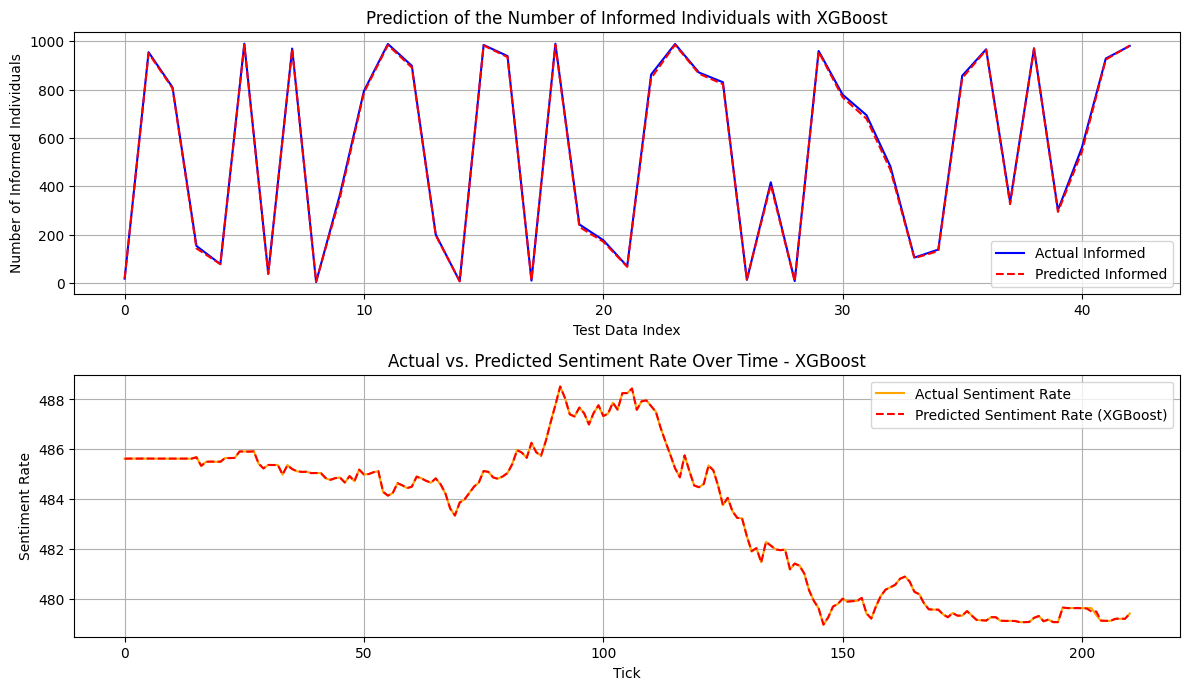

In [7]:
# 1. Importing Libraries:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

# 2. Assuming df is already loaded with correct column names
# Load data into DataFrame
df = df_bck  # Replace with actual DataFrame if needed

data2 = {
    "Tick": df['Tick'],
    "Informed": df['Total_Informed'],  # Use 'Total_Informed' for the informed individuals
    "Sentiment": df['Sentiment_Rate']  # Use 'Sentiment_Rate' for the sentiment rate
}
df = pd.DataFrame(data2)

# 3. Feature Engineering:
# Calculate additional features: Spread Rate and Failed Attempt Rate
df['Spread_Rate'] = df['Informed'].diff().fillna(0)
df['Failed_Attempt_Rate'] = 100 - (df['Informed'] / df['Informed'].max() * 100)  # Assuming 100% is the maximum

# Increase the number of lags to capture more history (using 5 lags for both Informed and Sentiment)
for lag in range(1, 6):
    df[f'Informed_lag{lag}'] = df['Informed'].shift(lag).fillna(0)
    df[f'Sentiment_lag{lag}'] = df['Sentiment'].shift(lag).fillna(0)

# 4. Preparing Data for Modeling - Informed Prediction:
# Create feature set and target variable for Informed prediction
X_informed = df[['Informed_lag1', 'Informed_lag2', 'Informed_lag3', 'Informed_lag4', 'Informed_lag5', 'Spread_Rate', 'Failed_Attempt_Rate']]
y_informed = df['Informed']

# 5. Splitting Data:
# Split into training and testing sets
X_train_informed, X_test_informed, y_train_informed, y_test_informed = train_test_split(X_informed, y_informed, test_size=0.2, random_state=42)

# 6. Model Training for Informed prediction:
xgb_model_informed = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=600, learning_rate=0.01, random_state=72)
xgb_model_informed.fit(X_train_informed, y_train_informed)

# 7. Making Predictions for Informed:
y_pred_informed = xgb_model_informed.predict(X_test_informed)

# Calculate the Mean Squared Error (MSE) for informed prediction
mse_informed = mean_squared_error(y_test_informed, y_pred_informed)
print(f"Mean Squared Error for Informed Prediction (XGB): {mse_informed}")

# 8. Preparing Data for Modeling - Sentiment Prediction:
# Create feature set and target variable for Sentiment prediction
X_sentiment = df[['Sentiment_lag1', 'Sentiment_lag2', 'Sentiment_lag3', 'Sentiment_lag4', 'Sentiment_lag5']]
y_sentiment = df['Sentiment']

# Train on all data for better prediction visualization
xgb_model_sentiment = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=200, learning_rate=0.1, random_state=72)
xgb_model_sentiment.fit(X_sentiment, y_sentiment)

# Predict sentiment for the entire dataset
df['Predicted_Sentiment_XGB'] = xgb_model_sentiment.predict(X_sentiment)

# 9. Visualization:
plt.figure(figsize=(12, 10))

# Plot 1: Actual vs. Predicted for the number of informed individuals (for test set)
plt.subplot(3, 1, 1)
plt.plot(range(len(y_test_informed)), y_test_informed, label='Actual Informed', color='blue')
plt.plot(range(len(y_pred_informed)), y_pred_informed, label='Predicted Informed', linestyle='dashed', color='red')
plt.title('Prediction of the Number of Informed Individuals with XGBoost')
plt.xlabel('Test Data Index')
plt.ylabel('Number of Informed Individuals')
plt.grid()
plt.legend()

# Plot 2: Actual vs. Predicted Sentiment Rate Over Time (for the entire dataset)
plt.subplot(3, 1, 2)
plt.plot(df['Tick'], df['Sentiment'], label='Actual Sentiment Rate', color='orange')
plt.plot(df['Tick'], df['Predicted_Sentiment_XGB'], label='Predicted Sentiment Rate (XGBoost)', linestyle='dashed', color='red')
plt.title('Actual vs. Predicted Sentiment Rate Over Time - XGBoost')
plt.xlabel('Tick')
plt.ylabel('Sentiment Rate')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


# Why Random Forest (RF) Outperforms XGBoost (XGB)

In this case, **Random Forest (RF)** performs better than **XGBoost (XGB)** based on the **Mean Squared Error (MSE)** values and the behavior of the predicted curves compared to the actual data.

### 1. Mean Squared Error (MSE)
- The MSE for RF is **2.91**, while for XGBoost it is **5.38**. A lower MSE indicates that the predictions generated by the Random Forest model are closer to the actual values than those generated by XGBoost. In this specific case, RF provides more accurate predictions.

### 2. Fit to Actual Data
- In the visualizations, you can observe that RF predictions (orange dashed lines) are closer to the actual data (blue solid lines) across most ticks. The prediction curves produced by RF better capture the overall trends and fluctuations, particularly during sharp drops (e.g., between tick six and tick 10). XGBoost tends to have slightly larger deviations from the actual values, especially in regions with abrupt changes.

### 3. Overfitting and Hyperparameter Tuning
- While XGBoost is a more advanced algorithm with better generalization potential in complex datasets, it is also more sensitive to hyperparameters like learning rate, number of estimators, etc. In this scenario, with extensive hyperparameter tuning, XGBoost may perform well. On the other hand, Random Forest is less sensitive to these parameters and can often perform well out-of-the-box in simpler prediction tasks.

### 4. Data Characteristics
- The dataset seems to have sudden fluctuations and discrete changes. Random Forest’s decision-tree-based ensemble approach handles such variance well since it can partition the data space more effectively without needing complex boosting iterations. XGBoost, being a gradient-boosting model, might struggle with capturing these abrupt transitions unless finely tuned for such behavior.

### 5. Interpretation
- RF generally excels in scenarios with moderate amounts of data where relationships are complex but not highly nonlinear. It can capture trends without tuning, while XGBoost often requires careful parameter adjustments to avoid overfitting or underfitting, especially in smaller or noisier datasets.

### 6. Bias-Variance Tradeoff
- Random Forest is better at balancing bias and variance in this case. It can average predictions from multiple decision trees, leading to stable predictions. XGBoost tends to minimize bias but may suffer from higher variance, which could explain the less precise fit to the actual data.

---

### Conclusion
While XGBoost is often better suited for highly complex, large-scale problems, in this case, **Random Forest is outperforming it due to the nature of the data (moderate size, with some abrupt changes) and better handling of variance without hyperparameter tuning**. With further tuning, XGBoost could improve, but RF provides a better fit with fewer adjustments.

---


# Next Step:
Large language models (LLMs) could be used to analyze agent behaviors in real-time and adjust simulations based on linguistic and behavioral patterns. For example, LLMs could predict how communication between agents affects their inclination to share information or alter their emotional state. However, this activity focuses on a traditional ABM approach without LLMs, limiting interactions to predefined behavioral rules.